_Iris veri kümesini kullanarak:_
- _Kmeans yöntemiyle, k değerini değiştirdiğinde ne olacağını inceleyin._
- _Hangi çözümü en iyi olarak görüyorsunuz? Karmaşıklık bu veri kümesinde bir sorun olmaya başlıyor mu?_
- _3'ten fazla kümey içeren bir sonuç bulabileceğinizi aklınızdan çıkarmayın. Bu kümelerden ikisi tek bir çiçek türüyle eşleşirken, diğer ikisi örneğin diğer türlerle eşlenir._

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn import datasets
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

df = pd.DataFrame(x)

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

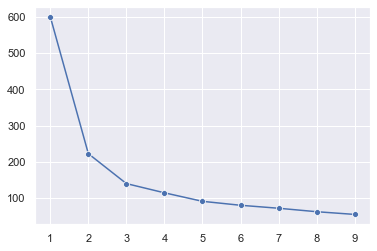

In [4]:
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_std)
    wcss.append(kmeans.inertia_)
    
sns.lineplot(range(1,10), wcss, marker = 'o')
plt.show()

In [5]:
for k in range(2,6):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_std)
    df['pred_'+str(k)] = kmeans.predict(x_std)
    
df.head(3)

,0,1,2,3,pred_2,pred_3,pred_4,pred_5
0,5.1,3.5,1.4,0.2,0,0,1,1
1,4.9,3.0,1.4,0.2,0,0,1,4
2,4.7,3.2,1.3,0.2,0,0,1,4


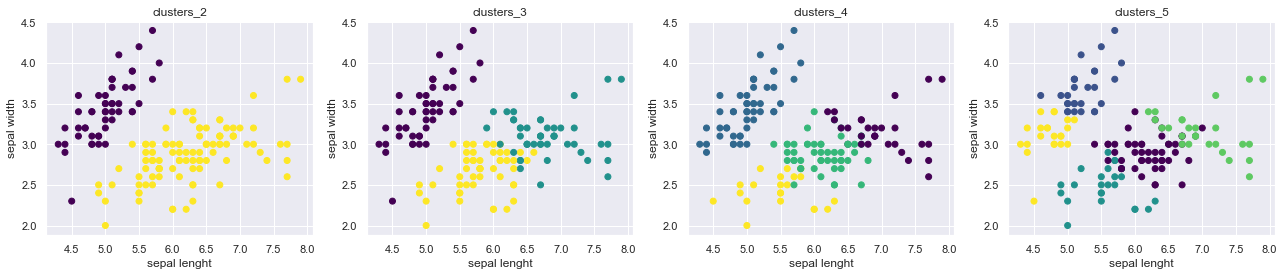

In [6]:
plt.figure(figsize=(18,4))
for num, k in enumerate(range(2,6),1):
    plt.subplot(1, 4, num)
    plt.scatter(df[0], df[1], c = df['pred_'+str(k)], cmap = 'viridis')
    plt.xlabel('sepal lenght')
    plt.ylabel('sepal width')
    plt.title('clusters_'+str(k))
    plt.tight_layout()

_Kalp krizi riski'ne ilişkin veri kümesini kullanarak:_
- _Hastaları "kalp hastalığı tanısı" veya "kalp hastalığı tanısı yok" kümelerine doğru şekilde atayan bir k-ortalama çözümü oluşturun._
- _Bu durumda, aslında iki olan verideki doğru küme sayısını biliyoruz. Ancak burada, k-ortalamanın beklediğimiz şekilde gözlemleri atayıp atamadığını test edeceksiniz. K-ortalama, denetimsiz bir öğrenme algoritması olduğu için, hastaların kalp hastalığı olup olmadığına karşı kör olacaktır._

In [7]:
df = pd.read_excel('heart.xlsx')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,negative
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,negative
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3,negative


In [8]:
df['ca'] = df.ca.replace('<null>', 0)
df['thal'] = df.thal.replace('<null>', 3)
df['num'] = df.num.replace({'positive':1, "negative":0})

In [9]:
y = df.num
x = df.drop('num', axis=1)
x_smote, y_smote = SMOTE(random_state=11, sampling_strategy=1.0).fit_sample(x, y)

scaler = StandardScaler()
x_std = scaler.fit_transform(x_smote)

pca = PCA(n_components = 2).fit_transform(x_std)
dfp = pd.DataFrame(pca)

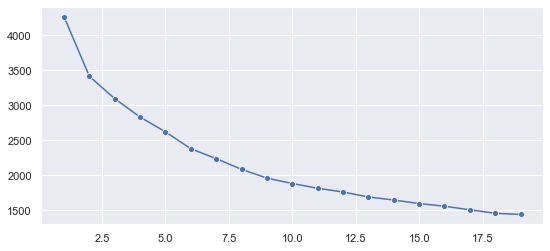

In [12]:
wcss = []
for k in range(1,20):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_std)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(9,4))
sns.lineplot(range(1,20), wcss, marker = 'o')
plt.show()

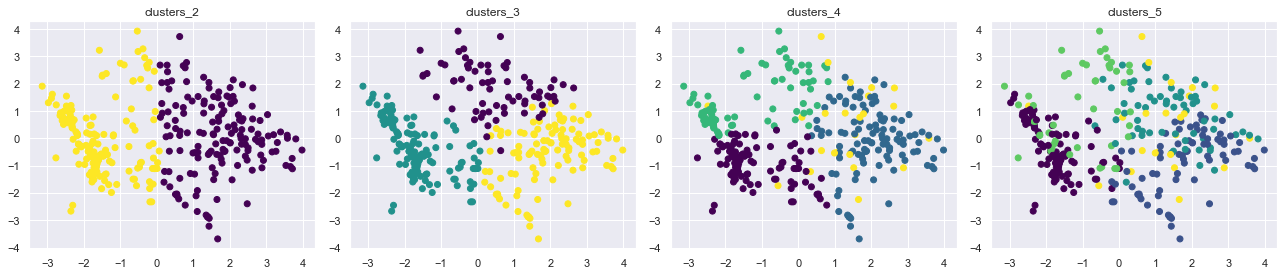

In [13]:
plt.figure(figsize=(18,4))
for num, k in enumerate(range(2,6),1):
    
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(x_std)
    dfp['pred_'+str(k)] = kmeans.predict(x_std)
    
    plt.subplot(1, 4, num)
    plt.scatter(dfp[0], dfp[1], c = dfp['pred_'+str(k)], cmap = 'viridis')
    plt.title('clusters_'+str(k))
    plt.tight_layout()

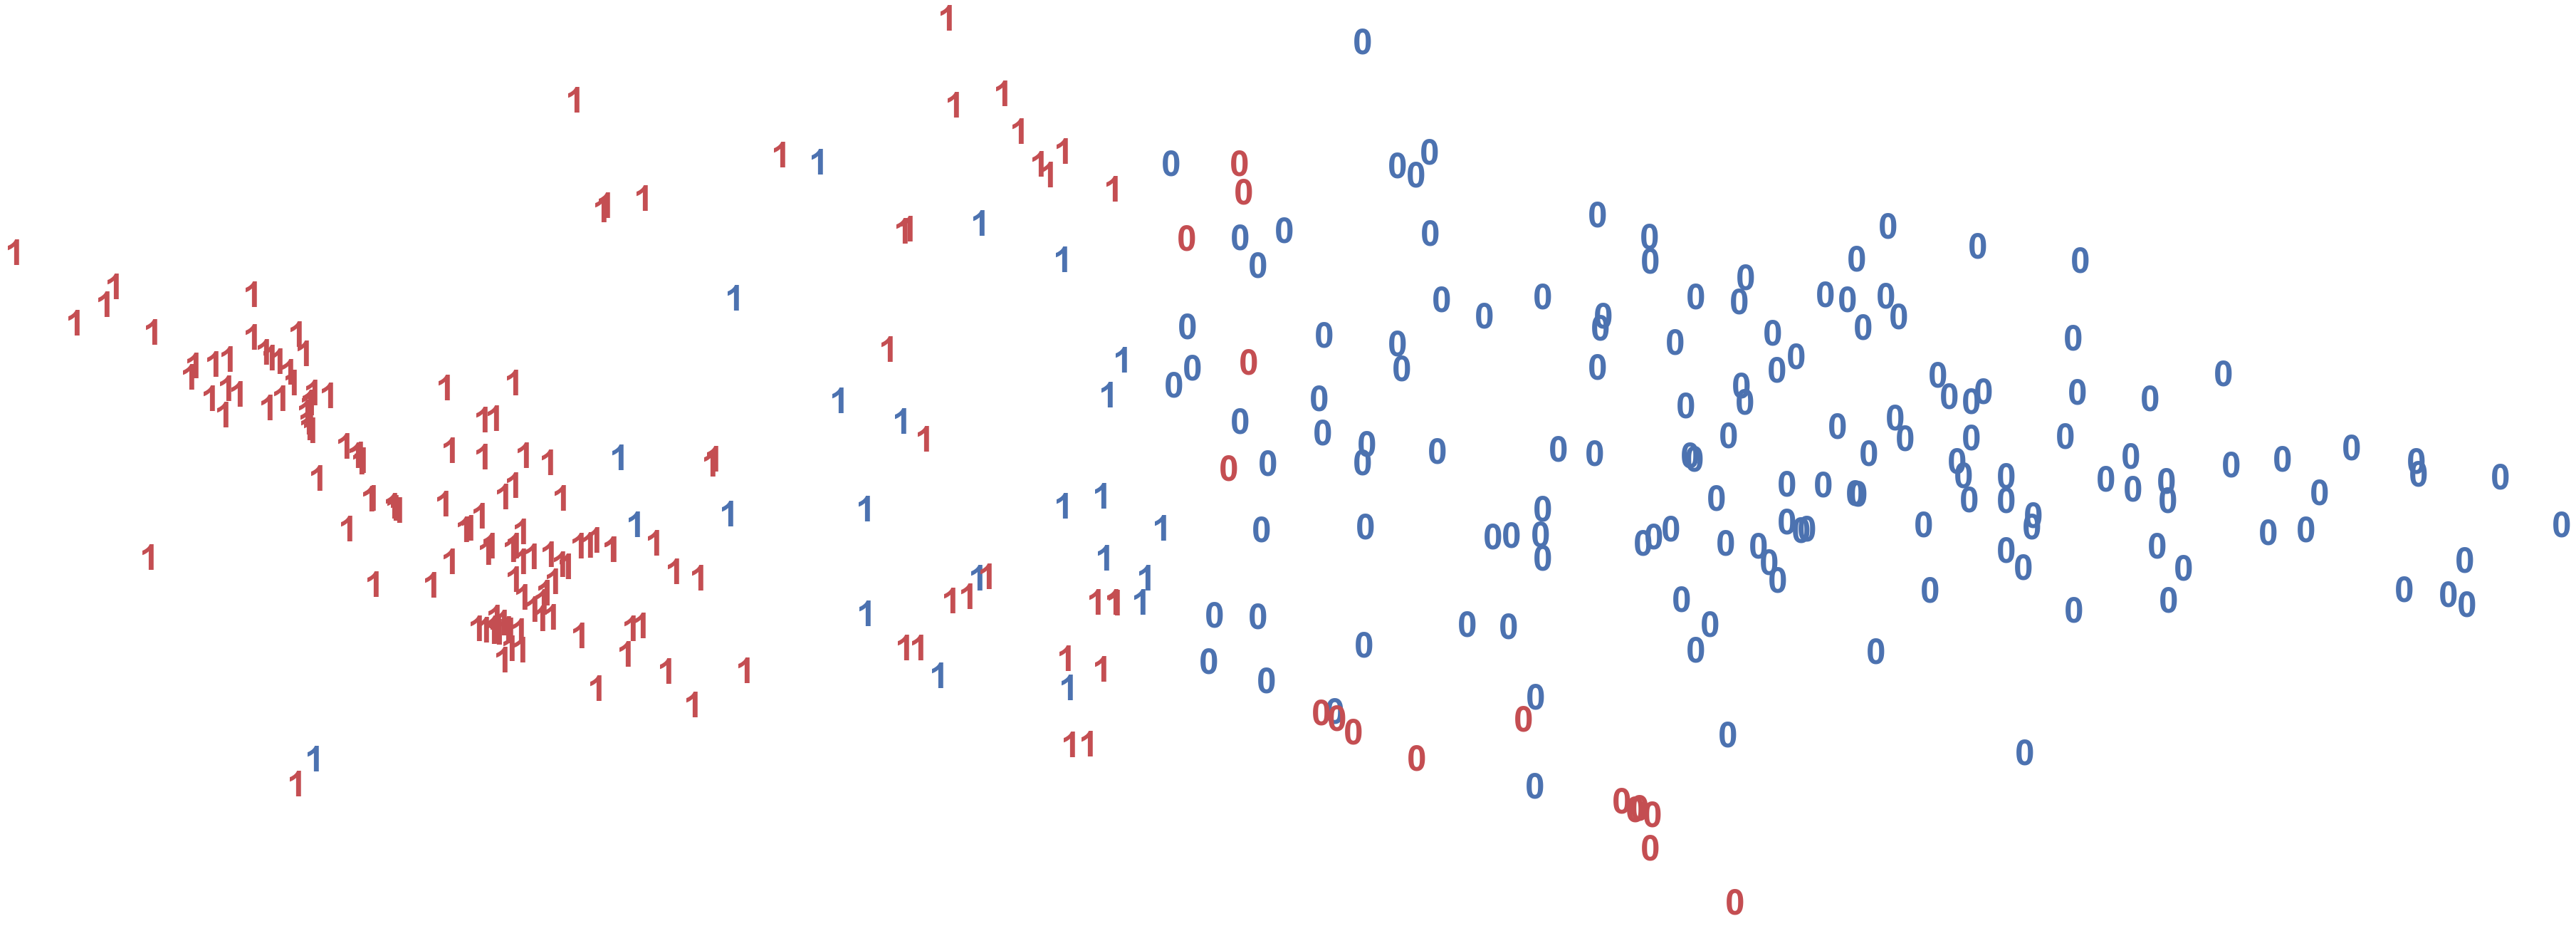

In [15]:
plt.figure(figsize=(9,3))
colours = 'br'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(dfp.pred_2[i]),
             color = colours[y_smote[i]],
             fontdict = {'weight': 'bold', 'size': 50})
plt.axis('off')
plt.show()